In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import preprocessing


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Marin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df_5000_D1_H4_H1 = pd.read_csv('./sample5000_detailed_reports.csv')
df_5000_D1_H4_H1.head()


Unnamed: 0    Pass   Profit  Total_trades  Profit_factor  Expected_Payoff  \
0           0  268997  4271.00            63           8.09            67.79   
1           1  183285  2184.80            63           5.04            34.68   
2           2  109256  1904.76            63           8.05            30.23   
3           3   85669  2706.16            63          11.74            42.95   
4           4  326453  2254.84            63          13.84            35.79   

   Drawdown_$  Drawdown_%   ??  volume_1  volume_2  volume_3  pips2  pips3  \
0     2111.40        2.10  0.0         7       1.0       1.0     18     14   
1     1454.52        1.45  0.0         5       0.9       0.3     17     10   
2     1618.74        1.62  0.0         6       0.6       0.3      6      7   
3     2439.84        2.44  0.0         9       0.7       0.7      3      6   
4      961.86        0.96  0.0         3       0.6       0.5     13     17   

   pips1  hiddenAction  timeFrame  risk ratio  
0      1             0       1440    2.022828  
1      1             0       1440    1.502076  
2      1             0       1440    1.176693  
3      1             0       1440    1.109155  
4      1             0       1440    2.344250

In [3]:
#split dataset in features and target variable
feature_cols = ["volume_1", "volume_2", "volume_3", "pips2","pips3", "timeFrame"]
X = df_5000_D1_H4_H1[feature_cols] # Features
y = df_5000_D1_H4_H1['risk ratio'] # Target variable

#digitize y
# y_enc = np.digitize(y, [0,1,2,3,4,5,6,7], right=True)

y_enc = round(y, 0)

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=1)



In [4]:
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y_train)

# y_tmp = y_train.to_numpy()
# y_tmp= np.reshape(y_tmp, (-1,1))

# lab_enc = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy = 'uniform')
# y_train_enc = lab_enc.fit(y_tmp)
# y_train_enc = pd.Series(y_train_enc)

# if y_train <= 1:
#     y_train_enc = 1
# elif y_train<=2:
#     y_train_enc = 2
# elif y_train<=3:
#     y_train_enc = 3
# elif y_train<=4:
#     y_train_enc = 4
# elif y_train<=5:
#     y_train_enc = 5
# elif y_train<=6:
#     y_train_enc = 6
# else:
#     y_train_enc = 7
    
# def discretize(data, bins):
#     split = np.array_split(np.sort(data), bins)
#     cutoffs = [x[-1] for x in split]
#     cutoffs = cutoffs[:-1]
#     discrete = np.digitize(data, cutoffs, right=True)
#     return discrete, cutoffs

# y_train_enc, cutoff = discretize(y_train, 7)

# y_train_enc = pd.cut(y_train, [1,2,3,4,5,6,7])
# y_train_enc = pd.Series(y_train_enc)

#y_train_enc = np.digitize(y_train, [0,1,2,3,4], right=True)

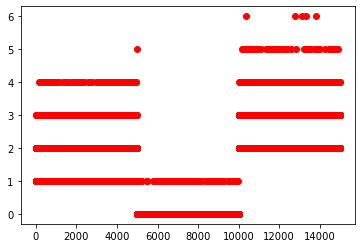

In [5]:
#sns.lineplot(data=spotify_data['Despacito'], label="Despacito")
# plt.plot(range(4500),y_test, 'ro')
plt.plot(y_train, 'ro')
# plt.plot(training_scores_encoded)
# plt.plot(y_test, 'r', '.')
plt.show()
# sns.scatterplot(x=y_pred, y=y_test)
# type(y_train_enc)


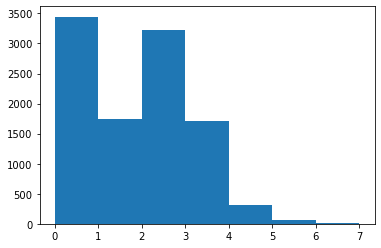

In [6]:
plt.hist(y_train, bins=[0,1,2,3,4,5,6,7])
# plt.ylabel('distribution of returns')
# plt.xlabel('intervals')
plt.show()

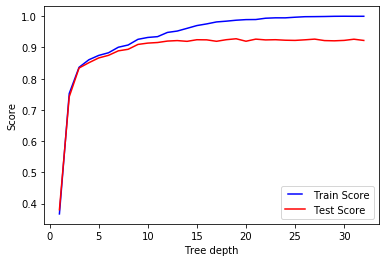

In [7]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    clf_2 = DecisionTreeRegressor(criterion='mae',max_depth=max_depth,presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [8]:
train_results

[0.3670040152835,
 0.752586636736676,
 0.8364566677593946,
 0.8606040054056585,
 0.8744854962985643,
 0.8830080860560692,
 0.9006989163102839,
 0.9078656395154584,
 0.9260407078240769,
 0.9320129771617223,
 0.9346278626555022,
 0.9480896805679248,
 0.9525123881314784,
 0.9611963905737845,
 0.9700740882378521,
 0.9754007068362927,
 0.9816958015435406,
 0.9841815568894795,
 0.9872161153637427,
 0.9891207850443972,
 0.9894113278770393,
 0.9936080576818713,
 0.994867076623321,
 0.9948025115494005,
 0.9968040288409357,
 0.9984504382259082,
 0.9987086985215902,
 0.9990960889651131,
 0.999741739704318,
 0.9999354349260795,
 0.9997740222412783,
 0.9998063047782385]

In [9]:
test_results 

[0.38035359305758265,
 0.7421854877589702,
 0.8341665731060581,
 0.8511065468210307,
 0.866411961668769,
 0.8747333522655977,
 0.8891471895493901,
 0.8941251642814215,
 0.9096906225853107,
 0.9139256160140539,
 0.915820218337439,
 0.9204267024178263,
 0.9219869631547316,
 0.9195722739190447,
 0.9247359939768982,
 0.9243645033252541,
 0.9197208701797024,
 0.9248474411723915,
 0.927856515450709,
 0.9199066155055244,
 0.9266677453654477,
 0.9241416089342677,
 0.9248102921072271,
 0.9231757332399929,
 0.9225813481973623,
 0.9244388014555829,
 0.9267048944306121,
 0.9219869631547316,
 0.9212439818514434,
 0.9225813481973623,
 0.9264077019092969,
 0.9224327519367046]

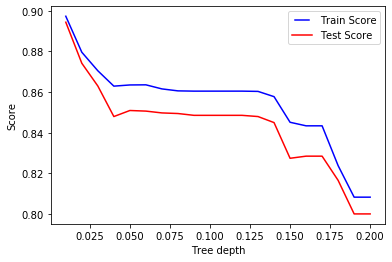

In [10]:
min_samples_splits = np.linspace(0.01, 0.2, 20, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf_2 = DecisionTreeRegressor(criterion='mae',
                                  min_samples_split=min_samples_split,
                                  presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)
    
line3, = plt.plot(min_samples_splits, train_results, 'b', label='Train Score')
line4, = plt.plot(min_samples_splits, test_results, 'r', label='Test Score')
plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [11]:
train_results

[0.8972769673924978,
 0.8795861371382832,
 0.8704824617154938,
 0.8629283480667962,
 0.8635094337320807,
 0.8635739988060012,
 0.861572481514466,
 0.8606040054056585,
 0.8604748752578175,
 0.8604748752578175,
 0.8604748752578175,
 0.8604748752578175,
 0.8603457451099765,
 0.857763142153157,
 0.8451729527386611,
 0.8434296957428078,
 0.8434296957428078,
 0.8238664783448988,
 0.8083708606039808,
 0.8083708606039808]

In [12]:
test_results

[0.894348058672408,
 0.8741761162881314,
 0.862994247673643,
 0.8479860253472199,
 0.850957950560373,
 0.8506607580390577,
 0.8497691804751117,
 0.8494719879537964,
 0.8485804103898505,
 0.8485804103898505,
 0.8485804103898505,
 0.8485804103898505,
 0.8479860253472199,
 0.8450141001340669,
 0.8274797413764636,
 0.8285199152010673,
 0.8285199152010673,
 0.8166322143484549,
 0.8001380294154553,
 0.8001380294154553]

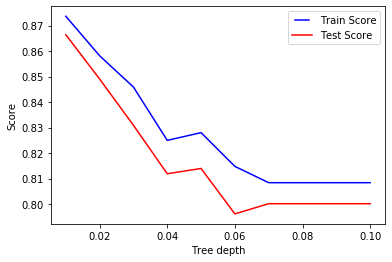

In [13]:
min_samples_leafs = np.linspace(0.01, 0.1, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    clf_2 = DecisionTreeRegressor(criterion='mae',
                                  min_samples_leaf=min_samples_leaf,
                                  presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)

line5, = plt.plot(min_samples_leafs, train_results, 'b', label='Train Score')
line6, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Score')
plt.legend(handler_map={line5: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [14]:
train_results

[0.8736461503375978,
 0.8581505325966798,
 0.8458831685517865,
 0.8249640846015471,
 0.8279986430758103,
 0.8147628029221095,
 0.8083708606039808,
 0.8083708606039808,
 0.8083708606039808,
 0.8083708606039808]

In [15]:
test_results

[0.866411961668769,
 0.8490261991718235,
 0.8308974553715897,
 0.81187713400741,
 0.8139574816566172,
 0.7961259303776986,
 0.8001380294154553,
 0.8001380294154553,
 0.8001380294154553,
 0.8001380294154553]

In [16]:
# Create Decision Tree regressor object
clf_2 = DecisionTreeRegressor(criterion='mae',
                              max_depth=6,
                              min_samples_split=0.02,
                              min_samples_leaf=0.02,
                              presort=True)

# Train Decision Tree Classifer
clf_2 = clf_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_2.predict(X_test)

tree_score=clf_2.score(X_test, y_test)
tree_score

0.8473916403045894

In [17]:
# pip install graphviz
# pip install pydotplus



dot_data = StringIO()
export_graphviz(clf_2, out_file='tree_limited.dot',  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=["volume_1", "volume_2", "volume_3", "pips2","pips3", "timeFrame"],
                rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Dyrvo.png')

!dot -Tpng tree_limited.dot -o tree_limited11.png -Gdpi=600

#Image(graph.create_png("C:/Users/Marin/Desktop/python/pic/tree_limited03.png"))

Image(filename = 'tree_limited22.png')



^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

rsq = r2_score(y_test, y_pred)

maerr = mean_absolute_error(y_test, y_pred)

print(maerr)
print(rsq)


0.21844444444444444
0.8473916403045894


In [19]:
rsq

0.8473916403045894

In [20]:
# Using those arrays, we can parse the tree structure:
n_nodes = clf_2.tree_.node_count
children_left = clf_2.tree_.children_left
children_right = clf_2.tree_.children_right
feature = clf_2.tree_.feature
threshold = clf_2.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        #print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
        #      "node %s."
        print("%snode=%s test node: go to node %s if %s <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature_cols[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 49 nodes and has the following tree structure:
node=0 test node: go to node 1 if timeFrame <= 150.0 else to node 22.
	node=1 test node: go to node 2 if pips2 <= 11.5 else to node 11.
		node=2 test node: go to node 3 if volume_1 <= 2.5 else to node 4.
			node=3 leaf node.
			node=4 test node: go to node 5 if volume_2 <= 0.2500000074505806 else to node 6.
				node=5 leaf node.
				node=6 test node: go to node 7 if volume_3 <= 0.3500000089406967 else to node 8.
					node=7 leaf node.
					node=8 test node: go to node 9 if volume_3 <= 0.6500000059604645 else to node 10.
						node=9 leaf node.
						node=10 leaf node.
		node=11 test node: go to node 12 if volume_1 <= 2.5 else to node 13.
			node=12 leaf node.
			node=13 test node: go to node 14 if volume_2 <= 0.75 else to node 19.
				node=14 test node: go to node 15 if volume_1 <= 4.5 else to node 16.
					node=15 leaf node.
					node=16 test node: go to node 17 if pips2 <= 14.5 else to node 18.
						node=17

In [21]:
# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.
node_indicator = clf_2.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.
leave_id = clf_2.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

for sample_id in range(0,10000):
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('Rules used to predict sample %s: ' % sample_id)
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="

        else:
            threshold_sign = ">"

        print("decision id node %s : %s, %s (= %s) %s %s)"
              % (node_id,
                 sample_id,
                 feature_cols[feature[node_id]],
                 X_test.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))

Rules used to predict sample 0: 
decision id node 0 : 0, timeFrame (= 240) > 150.0)
decision id node 22 : 0, timeFrame (= 240) <= 840.0)
decision id node 23 : 0, volume_3 (= 0.6) > 0.3500000089406967)
decision id node 27 : 0, pips3 (= 14) > 3.5)
decision id node 29 : 0, volume_2 (= 0.1) <= 0.15000000223517418)
Rules used to predict sample 1: 
decision id node 0 : 1, timeFrame (= 60) <= 150.0)
decision id node 1 : 1, pips2 (= 13) > 11.5)
decision id node 11 : 1, volume_1 (= 7) > 2.5)
decision id node 13 : 1, volume_2 (= 0.1) <= 0.75)
decision id node 14 : 1, volume_1 (= 7) > 4.5)
decision id node 16 : 1, pips2 (= 13) <= 14.5)
Rules used to predict sample 2: 
decision id node 0 : 2, timeFrame (= 1440) > 150.0)
decision id node 22 : 2, timeFrame (= 1440) > 840.0)
decision id node 34 : 2, volume_1 (= 9) > 5.5)
decision id node 42 : 2, volume_3 (= 0.8) <= 0.8499999940395355)
decision id node 43 : 2, volume_2 (= 0.8) > 0.2500000074505806)
decision id node 45 : 2, pips3 (= 5) <= 5.5)
Rules us

decision id node 34 : 124, volume_1 (= 4) <= 5.5)
decision id node 35 : 124, volume_1 (= 4) > 1.5)
decision id node 37 : 124, pips3 (= 20) > 5.5)
decision id node 39 : 124, volume_1 (= 4) > 2.5)
Rules used to predict sample 125: 
decision id node 0 : 125, timeFrame (= 1440) > 150.0)
decision id node 22 : 125, timeFrame (= 1440) > 840.0)
decision id node 34 : 125, volume_1 (= 4) <= 5.5)
decision id node 35 : 125, volume_1 (= 4) > 1.5)
decision id node 37 : 125, pips3 (= 11) > 5.5)
decision id node 39 : 125, volume_1 (= 4) > 2.5)
Rules used to predict sample 126: 
decision id node 0 : 126, timeFrame (= 240) > 150.0)
decision id node 22 : 126, timeFrame (= 240) <= 840.0)
decision id node 23 : 126, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 27 : 126, pips3 (= 2) <= 3.5)
Rules used to predict sample 127: 
decision id node 0 : 127, timeFrame (= 1440) > 150.0)
decision id node 22 : 127, timeFrame (= 1440) > 840.0)
decision id node 34 : 127, volume_1 (= 6) > 5.5)
decision id node 

decision id node 43 : 233, volume_2 (= 0.5) > 0.2500000074505806)
decision id node 45 : 233, pips3 (= 4) <= 5.5)
Rules used to predict sample 234: 
decision id node 0 : 234, timeFrame (= 1440) > 150.0)
decision id node 22 : 234, timeFrame (= 1440) > 840.0)
decision id node 34 : 234, volume_1 (= 7) > 5.5)
decision id node 42 : 234, volume_3 (= 0.8) <= 0.8499999940395355)
decision id node 43 : 234, volume_2 (= 0.6) > 0.2500000074505806)
decision id node 45 : 234, pips3 (= 20) > 5.5)
Rules used to predict sample 235: 
decision id node 0 : 235, timeFrame (= 60) <= 150.0)
decision id node 1 : 235, pips2 (= 16) > 11.5)
decision id node 11 : 235, volume_1 (= 2) <= 2.5)
Rules used to predict sample 236: 
decision id node 0 : 236, timeFrame (= 60) <= 150.0)
decision id node 1 : 236, pips2 (= 6) <= 11.5)
decision id node 2 : 236, volume_1 (= 1) <= 2.5)
Rules used to predict sample 237: 
decision id node 0 : 237, timeFrame (= 60) <= 150.0)
decision id node 1 : 237, pips2 (= 4) <= 11.5)
decision i

decision id node 1 : 265, pips2 (= 12) > 11.5)
decision id node 11 : 265, volume_1 (= 3) > 2.5)
decision id node 13 : 265, volume_2 (= 0.2) <= 0.75)
decision id node 14 : 265, volume_1 (= 3) <= 4.5)
Rules used to predict sample 266: 
decision id node 0 : 266, timeFrame (= 240) > 150.0)
decision id node 22 : 266, timeFrame (= 240) <= 840.0)
decision id node 23 : 266, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 27 : 266, pips3 (= 7) > 3.5)
decision id node 29 : 266, volume_2 (= 1.0) > 0.15000000223517418)
decision id node 31 : 266, pips2 (= 3) <= 3.5)
Rules used to predict sample 267: 
decision id node 0 : 267, timeFrame (= 1440) > 150.0)
decision id node 22 : 267, timeFrame (= 1440) > 840.0)
decision id node 34 : 267, volume_1 (= 3) <= 5.5)
decision id node 35 : 267, volume_1 (= 3) > 1.5)
decision id node 37 : 267, pips3 (= 13) > 5.5)
decision id node 39 : 267, volume_1 (= 3) > 2.5)
Rules used to predict sample 268: 
decision id node 0 : 268, timeFrame (= 1440) > 150.0)
deci

Rules used to predict sample 356: 
decision id node 0 : 356, timeFrame (= 240) > 150.0)
decision id node 22 : 356, timeFrame (= 240) <= 840.0)
decision id node 23 : 356, volume_3 (= 0.4) > 0.3500000089406967)
decision id node 27 : 356, pips3 (= 6) > 3.5)
decision id node 29 : 356, volume_2 (= 0.4) > 0.15000000223517418)
decision id node 31 : 356, pips2 (= 6) > 3.5)
Rules used to predict sample 357: 
decision id node 0 : 357, timeFrame (= 240) > 150.0)
decision id node 22 : 357, timeFrame (= 240) <= 840.0)
decision id node 23 : 357, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 27 : 357, pips3 (= 9) > 3.5)
decision id node 29 : 357, volume_2 (= 0.8) > 0.15000000223517418)
decision id node 31 : 357, pips2 (= 21) > 3.5)
Rules used to predict sample 358: 
decision id node 0 : 358, timeFrame (= 60) <= 150.0)
decision id node 1 : 358, pips2 (= 20) > 11.5)
decision id node 11 : 358, volume_1 (= 2) <= 2.5)
Rules used to predict sample 359: 
decision id node 0 : 359, timeFrame (= 1440

decision id node 4 : 445, volume_2 (= 0.5) > 0.2500000074505806)
decision id node 6 : 445, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 8 : 445, volume_3 (= 0.9) > 0.6500000059604645)
Rules used to predict sample 446: 
decision id node 0 : 446, timeFrame (= 240) > 150.0)
decision id node 22 : 446, timeFrame (= 240) <= 840.0)
decision id node 23 : 446, volume_3 (= 0.3) <= 0.3500000089406967)
decision id node 24 : 446, volume_1 (= 6) > 4.5)
Rules used to predict sample 447: 
decision id node 0 : 447, timeFrame (= 1440) > 150.0)
decision id node 22 : 447, timeFrame (= 1440) > 840.0)
decision id node 34 : 447, volume_1 (= 1) <= 5.5)
decision id node 35 : 447, volume_1 (= 1) <= 1.5)
Rules used to predict sample 448: 
decision id node 0 : 448, timeFrame (= 60) <= 150.0)
decision id node 1 : 448, pips2 (= 11) <= 11.5)
decision id node 2 : 448, volume_1 (= 9) > 2.5)
decision id node 4 : 448, volume_2 (= 0.3) > 0.2500000074505806)
decision id node 6 : 448, volume_3 (= 0.7) > 0.350000

decision id node 22 : 492, timeFrame (= 240) <= 840.0)
decision id node 23 : 492, volume_3 (= 0.1) <= 0.3500000089406967)
decision id node 24 : 492, volume_1 (= 5) > 4.5)
Rules used to predict sample 493: 
decision id node 0 : 493, timeFrame (= 1440) > 150.0)
decision id node 22 : 493, timeFrame (= 1440) > 840.0)
decision id node 34 : 493, volume_1 (= 10) > 5.5)
decision id node 42 : 493, volume_3 (= 0.4) <= 0.8499999940395355)
decision id node 43 : 493, volume_2 (= 0.8) > 0.2500000074505806)
decision id node 45 : 493, pips3 (= 2) <= 5.5)
Rules used to predict sample 494: 
decision id node 0 : 494, timeFrame (= 60) <= 150.0)
decision id node 1 : 494, pips2 (= 13) > 11.5)
decision id node 11 : 494, volume_1 (= 3) > 2.5)
decision id node 13 : 494, volume_2 (= 0.8) > 0.75)
decision id node 19 : 494, pips3 (= 11) <= 11.5)
Rules used to predict sample 495: 
decision id node 0 : 495, timeFrame (= 60) <= 150.0)
decision id node 1 : 495, pips2 (= 22) > 11.5)
decision id node 11 : 495, volume_1

Rules used to predict sample 602: 
decision id node 0 : 602, timeFrame (= 240) > 150.0)
decision id node 22 : 602, timeFrame (= 240) <= 840.0)
decision id node 23 : 602, volume_3 (= 0.4) > 0.3500000089406967)
decision id node 27 : 602, pips3 (= 2) <= 3.5)
Rules used to predict sample 603: 
decision id node 0 : 603, timeFrame (= 60) <= 150.0)
decision id node 1 : 603, pips2 (= 10) <= 11.5)
decision id node 2 : 603, volume_1 (= 4) > 2.5)
decision id node 4 : 603, volume_2 (= 0.2) <= 0.2500000074505806)
Rules used to predict sample 604: 
decision id node 0 : 604, timeFrame (= 60) <= 150.0)
decision id node 1 : 604, pips2 (= 6) <= 11.5)
decision id node 2 : 604, volume_1 (= 7) > 2.5)
decision id node 4 : 604, volume_2 (= 0.2) <= 0.2500000074505806)
Rules used to predict sample 605: 
decision id node 0 : 605, timeFrame (= 240) > 150.0)
decision id node 22 : 605, timeFrame (= 240) <= 840.0)
decision id node 23 : 605, volume_3 (= 1.0) > 0.3500000089406967)
decision id node 27 : 605, pips3 (= 

decision id node 11 : 766, volume_1 (= 4) > 2.5)
decision id node 13 : 766, volume_2 (= 0.6) <= 0.75)
decision id node 14 : 766, volume_1 (= 4) <= 4.5)
Rules used to predict sample 767: 
decision id node 0 : 767, timeFrame (= 60) <= 150.0)
decision id node 1 : 767, pips2 (= 13) > 11.5)
decision id node 11 : 767, volume_1 (= 9) > 2.5)
decision id node 13 : 767, volume_2 (= 1.0) > 0.75)
decision id node 19 : 767, pips3 (= 7) <= 11.5)
Rules used to predict sample 768: 
decision id node 0 : 768, timeFrame (= 1440) > 150.0)
decision id node 22 : 768, timeFrame (= 1440) > 840.0)
decision id node 34 : 768, volume_1 (= 7) > 5.5)
decision id node 42 : 768, volume_3 (= 0.9) > 0.8499999940395355)
Rules used to predict sample 769: 
decision id node 0 : 769, timeFrame (= 1440) > 150.0)
decision id node 22 : 769, timeFrame (= 1440) > 840.0)
decision id node 34 : 769, volume_1 (= 9) > 5.5)
decision id node 42 : 769, volume_3 (= 0.5) <= 0.8499999940395355)
decision id node 43 : 769, volume_2 (= 1.0) >

decision id node 29 : 927, volume_2 (= 0.5) > 0.15000000223517418)
decision id node 31 : 927, pips2 (= 18) > 3.5)
Rules used to predict sample 928: 
decision id node 0 : 928, timeFrame (= 1440) > 150.0)
decision id node 22 : 928, timeFrame (= 1440) > 840.0)
decision id node 34 : 928, volume_1 (= 8) > 5.5)
decision id node 42 : 928, volume_3 (= 1.0) > 0.8499999940395355)
Rules used to predict sample 929: 
decision id node 0 : 929, timeFrame (= 240) > 150.0)
decision id node 22 : 929, timeFrame (= 240) <= 840.0)
decision id node 23 : 929, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 27 : 929, pips3 (= 19) > 3.5)
decision id node 29 : 929, volume_2 (= 0.5) > 0.15000000223517418)
decision id node 31 : 929, pips2 (= 2) <= 3.5)
Rules used to predict sample 930: 
decision id node 0 : 930, timeFrame (= 240) > 150.0)
decision id node 22 : 930, timeFrame (= 240) <= 840.0)
decision id node 23 : 930, volume_3 (= 0.5) > 0.3500000089406967)
decision id node 27 : 930, pips3 (= 22) > 3.5)
d

decision id node 0 : 1085, timeFrame (= 1440) > 150.0)
decision id node 22 : 1085, timeFrame (= 1440) > 840.0)
decision id node 34 : 1085, volume_1 (= 1) <= 5.5)
decision id node 35 : 1085, volume_1 (= 1) <= 1.5)
Rules used to predict sample 1086: 
decision id node 0 : 1086, timeFrame (= 1440) > 150.0)
decision id node 22 : 1086, timeFrame (= 1440) > 840.0)
decision id node 34 : 1086, volume_1 (= 6) > 5.5)
decision id node 42 : 1086, volume_3 (= 1.0) > 0.8499999940395355)
Rules used to predict sample 1087: 
decision id node 0 : 1087, timeFrame (= 240) > 150.0)
decision id node 22 : 1087, timeFrame (= 240) <= 840.0)
decision id node 23 : 1087, volume_3 (= 0.1) <= 0.3500000089406967)
decision id node 24 : 1087, volume_1 (= 3) <= 4.5)
Rules used to predict sample 1088: 
decision id node 0 : 1088, timeFrame (= 60) <= 150.0)
decision id node 1 : 1088, pips2 (= 17) > 11.5)
decision id node 11 : 1088, volume_1 (= 4) > 2.5)
decision id node 13 : 1088, volume_2 (= 1.0) > 0.75)
decision id node 

decision id node 22 : 1248, timeFrame (= 1440) > 840.0)
decision id node 34 : 1248, volume_1 (= 4) <= 5.5)
decision id node 35 : 1248, volume_1 (= 4) > 1.5)
decision id node 37 : 1248, pips3 (= 13) > 5.5)
decision id node 39 : 1248, volume_1 (= 4) > 2.5)
Rules used to predict sample 1249: 
decision id node 0 : 1249, timeFrame (= 60) <= 150.0)
decision id node 1 : 1249, pips2 (= 20) > 11.5)
decision id node 11 : 1249, volume_1 (= 9) > 2.5)
decision id node 13 : 1249, volume_2 (= 0.7) <= 0.75)
decision id node 14 : 1249, volume_1 (= 9) > 4.5)
decision id node 16 : 1249, pips2 (= 20) > 14.5)
Rules used to predict sample 1250: 
decision id node 0 : 1250, timeFrame (= 1440) > 150.0)
decision id node 22 : 1250, timeFrame (= 1440) > 840.0)
decision id node 34 : 1250, volume_1 (= 5) <= 5.5)
decision id node 35 : 1250, volume_1 (= 5) > 1.5)
decision id node 37 : 1250, pips3 (= 17) > 5.5)
decision id node 39 : 1250, volume_1 (= 5) > 2.5)
Rules used to predict sample 1251: 
decision id node 0 : 1

Rules used to predict sample 1408: 
decision id node 0 : 1408, timeFrame (= 240) > 150.0)
decision id node 22 : 1408, timeFrame (= 240) <= 840.0)
decision id node 23 : 1408, volume_3 (= 0.1) <= 0.3500000089406967)
decision id node 24 : 1408, volume_1 (= 5) > 4.5)
Rules used to predict sample 1409: 
decision id node 0 : 1409, timeFrame (= 240) > 150.0)
decision id node 22 : 1409, timeFrame (= 240) <= 840.0)
decision id node 23 : 1409, volume_3 (= 0.2) <= 0.3500000089406967)
decision id node 24 : 1409, volume_1 (= 9) > 4.5)
Rules used to predict sample 1410: 
decision id node 0 : 1410, timeFrame (= 1440) > 150.0)
decision id node 22 : 1410, timeFrame (= 1440) > 840.0)
decision id node 34 : 1410, volume_1 (= 7) > 5.5)
decision id node 42 : 1410, volume_3 (= 0.8) <= 0.8499999940395355)
decision id node 43 : 1410, volume_2 (= 0.9) > 0.2500000074505806)
decision id node 45 : 1410, pips3 (= 14) > 5.5)
Rules used to predict sample 1411: 
decision id node 0 : 1411, timeFrame (= 240) > 150.0)
de

decision id node 34 : 1567, volume_1 (= 6) > 5.5)
decision id node 42 : 1567, volume_3 (= 0.1) <= 0.8499999940395355)
decision id node 43 : 1567, volume_2 (= 0.5) > 0.2500000074505806)
decision id node 45 : 1567, pips3 (= 14) > 5.5)
Rules used to predict sample 1568: 
decision id node 0 : 1568, timeFrame (= 1440) > 150.0)
decision id node 22 : 1568, timeFrame (= 1440) > 840.0)
decision id node 34 : 1568, volume_1 (= 3) <= 5.5)
decision id node 35 : 1568, volume_1 (= 3) > 1.5)
decision id node 37 : 1568, pips3 (= 17) > 5.5)
decision id node 39 : 1568, volume_1 (= 3) > 2.5)
Rules used to predict sample 1569: 
decision id node 0 : 1569, timeFrame (= 240) > 150.0)
decision id node 22 : 1569, timeFrame (= 240) <= 840.0)
decision id node 23 : 1569, volume_3 (= 1.0) > 0.3500000089406967)
decision id node 27 : 1569, pips3 (= 7) > 3.5)
decision id node 29 : 1569, volume_2 (= 0.2) > 0.15000000223517418)
decision id node 31 : 1569, pips2 (= 7) > 3.5)
Rules used to predict sample 1570: 
decision i

decision id node 0 : 1728, timeFrame (= 60) <= 150.0)
decision id node 1 : 1728, pips2 (= 10) <= 11.5)
decision id node 2 : 1728, volume_1 (= 1) <= 2.5)
Rules used to predict sample 1729: 
decision id node 0 : 1729, timeFrame (= 60) <= 150.0)
decision id node 1 : 1729, pips2 (= 12) > 11.5)
decision id node 11 : 1729, volume_1 (= 5) > 2.5)
decision id node 13 : 1729, volume_2 (= 0.2) <= 0.75)
decision id node 14 : 1729, volume_1 (= 5) > 4.5)
decision id node 16 : 1729, pips2 (= 12) <= 14.5)
Rules used to predict sample 1730: 
decision id node 0 : 1730, timeFrame (= 1440) > 150.0)
decision id node 22 : 1730, timeFrame (= 1440) > 840.0)
decision id node 34 : 1730, volume_1 (= 5) <= 5.5)
decision id node 35 : 1730, volume_1 (= 5) > 1.5)
decision id node 37 : 1730, pips3 (= 21) > 5.5)
decision id node 39 : 1730, volume_1 (= 5) > 2.5)
Rules used to predict sample 1731: 
decision id node 0 : 1731, timeFrame (= 240) > 150.0)
decision id node 22 : 1731, timeFrame (= 240) <= 840.0)
decision id n

Rules used to predict sample 1890: 
decision id node 0 : 1890, timeFrame (= 1440) > 150.0)
decision id node 22 : 1890, timeFrame (= 1440) > 840.0)
decision id node 34 : 1890, volume_1 (= 3) <= 5.5)
decision id node 35 : 1890, volume_1 (= 3) > 1.5)
decision id node 37 : 1890, pips3 (= 17) > 5.5)
decision id node 39 : 1890, volume_1 (= 3) > 2.5)
Rules used to predict sample 1891: 
decision id node 0 : 1891, timeFrame (= 1440) > 150.0)
decision id node 22 : 1891, timeFrame (= 1440) > 840.0)
decision id node 34 : 1891, volume_1 (= 5) <= 5.5)
decision id node 35 : 1891, volume_1 (= 5) > 1.5)
decision id node 37 : 1891, pips3 (= 3) <= 5.5)
Rules used to predict sample 1892: 
decision id node 0 : 1892, timeFrame (= 1440) > 150.0)
decision id node 22 : 1892, timeFrame (= 1440) > 840.0)
decision id node 34 : 1892, volume_1 (= 2) <= 5.5)
decision id node 35 : 1892, volume_1 (= 2) > 1.5)
decision id node 37 : 1892, pips3 (= 20) > 5.5)
decision id node 39 : 1892, volume_1 (= 2) <= 2.5)
Rules used 

decision id node 34 : 2054, volume_1 (= 4) <= 5.5)
decision id node 35 : 2054, volume_1 (= 4) > 1.5)
decision id node 37 : 2054, pips3 (= 11) > 5.5)
decision id node 39 : 2054, volume_1 (= 4) > 2.5)
Rules used to predict sample 2055: 
decision id node 0 : 2055, timeFrame (= 60) <= 150.0)
decision id node 1 : 2055, pips2 (= 10) <= 11.5)
decision id node 2 : 2055, volume_1 (= 6) > 2.5)
decision id node 4 : 2055, volume_2 (= 0.2) <= 0.2500000074505806)
Rules used to predict sample 2056: 
decision id node 0 : 2056, timeFrame (= 240) > 150.0)
decision id node 22 : 2056, timeFrame (= 240) <= 840.0)
decision id node 23 : 2056, volume_3 (= 1.0) > 0.3500000089406967)
decision id node 27 : 2056, pips3 (= 20) > 3.5)
decision id node 29 : 2056, volume_2 (= 0.8) > 0.15000000223517418)
decision id node 31 : 2056, pips2 (= 13) > 3.5)
Rules used to predict sample 2057: 
decision id node 0 : 2057, timeFrame (= 240) > 150.0)
decision id node 22 : 2057, timeFrame (= 240) <= 840.0)
decision id node 23 : 2

decision id node 22 : 2214, timeFrame (= 240) <= 840.0)
decision id node 23 : 2214, volume_3 (= 0.5) > 0.3500000089406967)
decision id node 27 : 2214, pips3 (= 7) > 3.5)
decision id node 29 : 2214, volume_2 (= 0.1) <= 0.15000000223517418)
Rules used to predict sample 2215: 
decision id node 0 : 2215, timeFrame (= 1440) > 150.0)
decision id node 22 : 2215, timeFrame (= 1440) > 840.0)
decision id node 34 : 2215, volume_1 (= 9) > 5.5)
decision id node 42 : 2215, volume_3 (= 0.2) <= 0.8499999940395355)
decision id node 43 : 2215, volume_2 (= 0.7) > 0.2500000074505806)
decision id node 45 : 2215, pips3 (= 7) > 5.5)
Rules used to predict sample 2216: 
decision id node 0 : 2216, timeFrame (= 60) <= 150.0)
decision id node 1 : 2216, pips2 (= 13) > 11.5)
decision id node 11 : 2216, volume_1 (= 2) <= 2.5)
Rules used to predict sample 2217: 
decision id node 0 : 2217, timeFrame (= 1440) > 150.0)
decision id node 22 : 2217, timeFrame (= 1440) > 840.0)
decision id node 34 : 2217, volume_1 (= 9) > 5

decision id node 31 : 2377, pips2 (= 22) > 3.5)
Rules used to predict sample 2378: 
decision id node 0 : 2378, timeFrame (= 240) > 150.0)
decision id node 22 : 2378, timeFrame (= 240) <= 840.0)
decision id node 23 : 2378, volume_3 (= 0.2) <= 0.3500000089406967)
decision id node 24 : 2378, volume_1 (= 7) > 4.5)
Rules used to predict sample 2379: 
decision id node 0 : 2379, timeFrame (= 240) > 150.0)
decision id node 22 : 2379, timeFrame (= 240) <= 840.0)
decision id node 23 : 2379, volume_3 (= 0.7) > 0.3500000089406967)
decision id node 27 : 2379, pips3 (= 7) > 3.5)
decision id node 29 : 2379, volume_2 (= 0.2) > 0.15000000223517418)
decision id node 31 : 2379, pips2 (= 4) > 3.5)
Rules used to predict sample 2380: 
decision id node 0 : 2380, timeFrame (= 240) > 150.0)
decision id node 22 : 2380, timeFrame (= 240) <= 840.0)
decision id node 23 : 2380, volume_3 (= 0.4) > 0.3500000089406967)
decision id node 27 : 2380, pips3 (= 19) > 3.5)
decision id node 29 : 2380, volume_2 (= 1.0) > 0.150

Rules used to predict sample 2541: 
decision id node 0 : 2541, timeFrame (= 240) > 150.0)
decision id node 22 : 2541, timeFrame (= 240) <= 840.0)
decision id node 23 : 2541, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 27 : 2541, pips3 (= 10) > 3.5)
decision id node 29 : 2541, volume_2 (= 1.0) > 0.15000000223517418)
decision id node 31 : 2541, pips2 (= 22) > 3.5)
Rules used to predict sample 2542: 
decision id node 0 : 2542, timeFrame (= 1440) > 150.0)
decision id node 22 : 2542, timeFrame (= 1440) > 840.0)
decision id node 34 : 2542, volume_1 (= 7) > 5.5)
decision id node 42 : 2542, volume_3 (= 0.4) <= 0.8499999940395355)
decision id node 43 : 2542, volume_2 (= 0.3) > 0.2500000074505806)
decision id node 45 : 2542, pips3 (= 22) > 5.5)
Rules used to predict sample 2543: 
decision id node 0 : 2543, timeFrame (= 1440) > 150.0)
decision id node 22 : 2543, timeFrame (= 1440) > 840.0)
decision id node 34 : 2543, volume_1 (= 5) <= 5.5)
decision id node 35 : 2543, volume_1 (= 5) > 

decision id node 0 : 2700, timeFrame (= 240) > 150.0)
decision id node 22 : 2700, timeFrame (= 240) <= 840.0)
decision id node 23 : 2700, volume_3 (= 0.4) > 0.3500000089406967)
decision id node 27 : 2700, pips3 (= 19) > 3.5)
decision id node 29 : 2700, volume_2 (= 0.8) > 0.15000000223517418)
decision id node 31 : 2700, pips2 (= 11) > 3.5)
Rules used to predict sample 2701: 
decision id node 0 : 2701, timeFrame (= 1440) > 150.0)
decision id node 22 : 2701, timeFrame (= 1440) > 840.0)
decision id node 34 : 2701, volume_1 (= 4) <= 5.5)
decision id node 35 : 2701, volume_1 (= 4) > 1.5)
decision id node 37 : 2701, pips3 (= 4) <= 5.5)
Rules used to predict sample 2702: 
decision id node 0 : 2702, timeFrame (= 60) <= 150.0)
decision id node 1 : 2702, pips2 (= 19) > 11.5)
decision id node 11 : 2702, volume_1 (= 4) > 2.5)
decision id node 13 : 2702, volume_2 (= 0.4) <= 0.75)
decision id node 14 : 2702, volume_1 (= 4) <= 4.5)
Rules used to predict sample 2703: 
decision id node 0 : 2703, timeFra

decision id node 35 : 2864, volume_1 (= 4) > 1.5)
decision id node 37 : 2864, pips3 (= 5) <= 5.5)
Rules used to predict sample 2865: 
decision id node 0 : 2865, timeFrame (= 60) <= 150.0)
decision id node 1 : 2865, pips2 (= 5) <= 11.5)
decision id node 2 : 2865, volume_1 (= 1) <= 2.5)
Rules used to predict sample 2866: 
decision id node 0 : 2866, timeFrame (= 60) <= 150.0)
decision id node 1 : 2866, pips2 (= 11) <= 11.5)
decision id node 2 : 2866, volume_1 (= 4) > 2.5)
decision id node 4 : 2866, volume_2 (= 0.4) > 0.2500000074505806)
decision id node 6 : 2866, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 8 : 2866, volume_3 (= 0.9) > 0.6500000059604645)
Rules used to predict sample 2867: 
decision id node 0 : 2867, timeFrame (= 60) <= 150.0)
decision id node 1 : 2867, pips2 (= 15) > 11.5)
decision id node 11 : 2867, volume_1 (= 10) > 2.5)
decision id node 13 : 2867, volume_2 (= 0.6) <= 0.75)
decision id node 14 : 2867, volume_1 (= 10) > 4.5)
decision id node 16 : 2867, pips2 

Rules used to predict sample 3026: 
decision id node 0 : 3026, timeFrame (= 240) > 150.0)
decision id node 22 : 3026, timeFrame (= 240) <= 840.0)
decision id node 23 : 3026, volume_3 (= 0.7) > 0.3500000089406967)
decision id node 27 : 3026, pips3 (= 4) > 3.5)
decision id node 29 : 3026, volume_2 (= 0.3) > 0.15000000223517418)
decision id node 31 : 3026, pips2 (= 21) > 3.5)
Rules used to predict sample 3027: 
decision id node 0 : 3027, timeFrame (= 240) > 150.0)
decision id node 22 : 3027, timeFrame (= 240) <= 840.0)
decision id node 23 : 3027, volume_3 (= 0.7) > 0.3500000089406967)
decision id node 27 : 3027, pips3 (= 16) > 3.5)
decision id node 29 : 3027, volume_2 (= 0.7) > 0.15000000223517418)
decision id node 31 : 3027, pips2 (= 12) > 3.5)
Rules used to predict sample 3028: 
decision id node 0 : 3028, timeFrame (= 60) <= 150.0)
decision id node 1 : 3028, pips2 (= 5) <= 11.5)
decision id node 2 : 3028, volume_1 (= 7) > 2.5)
decision id node 4 : 3028, volume_2 (= 0.5) > 0.250000007450

decision id node 34 : 3187, volume_1 (= 8) > 5.5)
decision id node 42 : 3187, volume_3 (= 0.5) <= 0.8499999940395355)
decision id node 43 : 3187, volume_2 (= 0.2) <= 0.2500000074505806)
Rules used to predict sample 3188: 
decision id node 0 : 3188, timeFrame (= 1440) > 150.0)
decision id node 22 : 3188, timeFrame (= 1440) > 840.0)
decision id node 34 : 3188, volume_1 (= 3) <= 5.5)
decision id node 35 : 3188, volume_1 (= 3) > 1.5)
decision id node 37 : 3188, pips3 (= 16) > 5.5)
decision id node 39 : 3188, volume_1 (= 3) > 2.5)
Rules used to predict sample 3189: 
decision id node 0 : 3189, timeFrame (= 60) <= 150.0)
decision id node 1 : 3189, pips2 (= 17) > 11.5)
decision id node 11 : 3189, volume_1 (= 4) > 2.5)
decision id node 13 : 3189, volume_2 (= 0.5) <= 0.75)
decision id node 14 : 3189, volume_1 (= 4) <= 4.5)
Rules used to predict sample 3190: 
decision id node 0 : 3190, timeFrame (= 60) <= 150.0)
decision id node 1 : 3190, pips2 (= 5) <= 11.5)
decision id node 2 : 3190, volume_1 (

decision id node 24 : 3350, volume_1 (= 6) > 4.5)
Rules used to predict sample 3351: 
decision id node 0 : 3351, timeFrame (= 240) > 150.0)
decision id node 22 : 3351, timeFrame (= 240) <= 840.0)
decision id node 23 : 3351, volume_3 (= 0.1) <= 0.3500000089406967)
decision id node 24 : 3351, volume_1 (= 6) > 4.5)
Rules used to predict sample 3352: 
decision id node 0 : 3352, timeFrame (= 1440) > 150.0)
decision id node 22 : 3352, timeFrame (= 1440) > 840.0)
decision id node 34 : 3352, volume_1 (= 9) > 5.5)
decision id node 42 : 3352, volume_3 (= 0.1) <= 0.8499999940395355)
decision id node 43 : 3352, volume_2 (= 0.7) > 0.2500000074505806)
decision id node 45 : 3352, pips3 (= 13) > 5.5)
Rules used to predict sample 3353: 
decision id node 0 : 3353, timeFrame (= 1440) > 150.0)
decision id node 22 : 3353, timeFrame (= 1440) > 840.0)
decision id node 34 : 3353, volume_1 (= 6) > 5.5)
decision id node 42 : 3353, volume_3 (= 0.3) <= 0.8499999940395355)
decision id node 43 : 3353, volume_2 (= 0

Rules used to predict sample 3514: 
decision id node 0 : 3514, timeFrame (= 60) <= 150.0)
decision id node 1 : 3514, pips2 (= 19) > 11.5)
decision id node 11 : 3514, volume_1 (= 8) > 2.5)
decision id node 13 : 3514, volume_2 (= 0.4) <= 0.75)
decision id node 14 : 3514, volume_1 (= 8) > 4.5)
decision id node 16 : 3514, pips2 (= 19) > 14.5)
Rules used to predict sample 3515: 
decision id node 0 : 3515, timeFrame (= 60) <= 150.0)
decision id node 1 : 3515, pips2 (= 6) <= 11.5)
decision id node 2 : 3515, volume_1 (= 10) > 2.5)
decision id node 4 : 3515, volume_2 (= 0.1) <= 0.2500000074505806)
Rules used to predict sample 3516: 
decision id node 0 : 3516, timeFrame (= 1440) > 150.0)
decision id node 22 : 3516, timeFrame (= 1440) > 840.0)
decision id node 34 : 3516, volume_1 (= 10) > 5.5)
decision id node 42 : 3516, volume_3 (= 0.5) <= 0.8499999940395355)
decision id node 43 : 3516, volume_2 (= 0.1) <= 0.2500000074505806)
Rules used to predict sample 3517: 
decision id node 0 : 3517, timeFra

decision id node 1 : 3679, pips2 (= 13) > 11.5)
decision id node 11 : 3679, volume_1 (= 7) > 2.5)
decision id node 13 : 3679, volume_2 (= 0.9) > 0.75)
decision id node 19 : 3679, pips3 (= 12) > 11.5)
Rules used to predict sample 3680: 
decision id node 0 : 3680, timeFrame (= 1440) > 150.0)
decision id node 22 : 3680, timeFrame (= 1440) > 840.0)
decision id node 34 : 3680, volume_1 (= 7) > 5.5)
decision id node 42 : 3680, volume_3 (= 0.6) <= 0.8499999940395355)
decision id node 43 : 3680, volume_2 (= 0.3) > 0.2500000074505806)
decision id node 45 : 3680, pips3 (= 21) > 5.5)
Rules used to predict sample 3681: 
decision id node 0 : 3681, timeFrame (= 1440) > 150.0)
decision id node 22 : 3681, timeFrame (= 1440) > 840.0)
decision id node 34 : 3681, volume_1 (= 10) > 5.5)
decision id node 42 : 3681, volume_3 (= 0.9) > 0.8499999940395355)
Rules used to predict sample 3682: 
decision id node 0 : 3682, timeFrame (= 1440) > 150.0)
decision id node 22 : 3682, timeFrame (= 1440) > 840.0)
decision

Rules used to predict sample 3841: 
decision id node 0 : 3841, timeFrame (= 240) > 150.0)
decision id node 22 : 3841, timeFrame (= 240) <= 840.0)
decision id node 23 : 3841, volume_3 (= 0.1) <= 0.3500000089406967)
decision id node 24 : 3841, volume_1 (= 5) > 4.5)
Rules used to predict sample 3842: 
decision id node 0 : 3842, timeFrame (= 240) > 150.0)
decision id node 22 : 3842, timeFrame (= 240) <= 840.0)
decision id node 23 : 3842, volume_3 (= 0.4) > 0.3500000089406967)
decision id node 27 : 3842, pips3 (= 7) > 3.5)
decision id node 29 : 3842, volume_2 (= 0.7) > 0.15000000223517418)
decision id node 31 : 3842, pips2 (= 2) <= 3.5)
Rules used to predict sample 3843: 
decision id node 0 : 3843, timeFrame (= 60) <= 150.0)
decision id node 1 : 3843, pips2 (= 20) > 11.5)
decision id node 11 : 3843, volume_1 (= 2) <= 2.5)
Rules used to predict sample 3844: 
decision id node 0 : 3844, timeFrame (= 60) <= 150.0)
decision id node 1 : 3844, pips2 (= 14) > 11.5)
decision id node 11 : 3844, volum

Rules used to predict sample 4003: 
decision id node 0 : 4003, timeFrame (= 60) <= 150.0)
decision id node 1 : 4003, pips2 (= 6) <= 11.5)
decision id node 2 : 4003, volume_1 (= 2) <= 2.5)
Rules used to predict sample 4004: 
decision id node 0 : 4004, timeFrame (= 1440) > 150.0)
decision id node 22 : 4004, timeFrame (= 1440) > 840.0)
decision id node 34 : 4004, volume_1 (= 6) > 5.5)
decision id node 42 : 4004, volume_3 (= 0.1) <= 0.8499999940395355)
decision id node 43 : 4004, volume_2 (= 0.4) > 0.2500000074505806)
decision id node 45 : 4004, pips3 (= 20) > 5.5)
Rules used to predict sample 4005: 
decision id node 0 : 4005, timeFrame (= 240) > 150.0)
decision id node 22 : 4005, timeFrame (= 240) <= 840.0)
decision id node 23 : 4005, volume_3 (= 0.9) > 0.3500000089406967)
decision id node 27 : 4005, pips3 (= 5) > 3.5)
decision id node 29 : 4005, volume_2 (= 0.4) > 0.15000000223517418)
decision id node 31 : 4005, pips2 (= 22) > 3.5)
Rules used to predict sample 4006: 
decision id node 0 :

decision id node 29 : 4163, volume_2 (= 0.7) > 0.15000000223517418)
decision id node 31 : 4163, pips2 (= 9) > 3.5)
Rules used to predict sample 4164: 
decision id node 0 : 4164, timeFrame (= 60) <= 150.0)
decision id node 1 : 4164, pips2 (= 9) <= 11.5)
decision id node 2 : 4164, volume_1 (= 6) > 2.5)
decision id node 4 : 4164, volume_2 (= 0.3) > 0.2500000074505806)
decision id node 6 : 4164, volume_3 (= 0.1) <= 0.3500000089406967)
Rules used to predict sample 4165: 
decision id node 0 : 4165, timeFrame (= 240) > 150.0)
decision id node 22 : 4165, timeFrame (= 240) <= 840.0)
decision id node 23 : 4165, volume_3 (= 0.5) > 0.3500000089406967)
decision id node 27 : 4165, pips3 (= 21) > 3.5)
decision id node 29 : 4165, volume_2 (= 0.7) > 0.15000000223517418)
decision id node 31 : 4165, pips2 (= 3) <= 3.5)
Rules used to predict sample 4166: 
decision id node 0 : 4166, timeFrame (= 60) <= 150.0)
decision id node 1 : 4166, pips2 (= 11) <= 11.5)
decision id node 2 : 4166, volume_1 (= 7) > 2.5)


decision id node 0 : 4324, timeFrame (= 240) > 150.0)
decision id node 22 : 4324, timeFrame (= 240) <= 840.0)
decision id node 23 : 4324, volume_3 (= 0.1) <= 0.3500000089406967)
decision id node 24 : 4324, volume_1 (= 1) <= 4.5)
Rules used to predict sample 4325: 
decision id node 0 : 4325, timeFrame (= 60) <= 150.0)
decision id node 1 : 4325, pips2 (= 18) > 11.5)
decision id node 11 : 4325, volume_1 (= 1) <= 2.5)
Rules used to predict sample 4326: 
decision id node 0 : 4326, timeFrame (= 240) > 150.0)
decision id node 22 : 4326, timeFrame (= 240) <= 840.0)
decision id node 23 : 4326, volume_3 (= 0.3) <= 0.3500000089406967)
decision id node 24 : 4326, volume_1 (= 3) <= 4.5)
Rules used to predict sample 4327: 
decision id node 0 : 4327, timeFrame (= 60) <= 150.0)
decision id node 1 : 4327, pips2 (= 16) > 11.5)
decision id node 11 : 4327, volume_1 (= 10) > 2.5)
decision id node 13 : 4327, volume_2 (= 0.8) > 0.75)
decision id node 19 : 4327, pips3 (= 20) > 11.5)
Rules used to predict samp

decision id node 29 : 4483, volume_2 (= 0.4) > 0.15000000223517418)
decision id node 31 : 4483, pips2 (= 5) > 3.5)
Rules used to predict sample 4484: 
decision id node 0 : 4484, timeFrame (= 240) > 150.0)
decision id node 22 : 4484, timeFrame (= 240) <= 840.0)
decision id node 23 : 4484, volume_3 (= 0.6) > 0.3500000089406967)
decision id node 27 : 4484, pips3 (= 12) > 3.5)
decision id node 29 : 4484, volume_2 (= 0.4) > 0.15000000223517418)
decision id node 31 : 4484, pips2 (= 2) <= 3.5)
Rules used to predict sample 4485: 
decision id node 0 : 4485, timeFrame (= 60) <= 150.0)
decision id node 1 : 4485, pips2 (= 13) > 11.5)
decision id node 11 : 4485, volume_1 (= 5) > 2.5)
decision id node 13 : 4485, volume_2 (= 0.5) <= 0.75)
decision id node 14 : 4485, volume_1 (= 5) > 4.5)
decision id node 16 : 4485, pips2 (= 13) <= 14.5)
Rules used to predict sample 4486: 
decision id node 0 : 4486, timeFrame (= 60) <= 150.0)
decision id node 1 : 4486, pips2 (= 21) > 11.5)
decision id node 11 : 4486, 

IndexError: index 4501 is out of bounds for axis 0 with size 4501

In [ ]:
# sample_id = 37
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 37
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue
        
    if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="

    else:
        threshold_sign = ">"

    print("decision id node %s : %s, %s (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature_cols[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

In [ ]:
# sample_id = 24
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 24
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue
        
    if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="

    else:
        threshold_sign = ">"

    print("decision id node %s : %s, %s (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature_cols[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

In [ ]:
# sample_id = 51
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 51
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue
        
    if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="

    else:
        threshold_sign = ">"

    print("decision id node %s : %s, %s (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature_cols[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

In [ ]:
# For a group of samples, we have the following common node.
sample_ids = [37, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

In [ ]:
# feature importance
print('Feature importance')
feature_impo = pd.DataFrame([clf_2.feature_importances_])
feature_impo.columns = feature_cols
feature_impo

In [ ]:
proba = np.linspace(0.01, 0.1, 10, endpoint=True)
#proba = np.linspace(1, 32, 32, endpoint=True)

In [ ]:
proba
